In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='DengXian')
# import tikzplotlib

my_dict = {'s': 1, 'ms': 1e3, 'μs': 1e6 ,'ns':1e9}
# print(my_dict)
plt.rcParams.update({'axes.labelsize': 16,'xtick.labelsize': 14, 'ytick.labelsize': 14,'legend.fontsize': 12})

def mydraw2(filename,title='Waveforms on the oscilloscope',label1='CH1',label2='CH2',x_label='时间',y_label='电压/V',yrange=((),()),time_unit='s',save=''):
    if time_unit=='us':
        time_unit='μs'
    df = pd.read_csv(filename)
    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)
    ch2_data = df.iloc[1:, 2].to_numpy(dtype=float)

    dt=df['Increment'][0]
    delt=df['Start'][0]
    # print('delt',delt)
    x_data=x_data*dt+delt
    x_data*=my_dict[time_unit]

    # 创建两个子图
    plt.figure(figsize=(8,4))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ylim1,ylim2=yrange
    # 在第一个子图中绘制第一条曲线
    ax1.plot(x_data, ch1_data, label=label1, color='red')
    # ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    if len(ylim1)!=0:
        ymin,ymax=ylim1
        ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.plot(x_data, ch2_data, label=label2, color='blue')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)
    if len(ylim2)!=0:
        ymin,ymax=ylim2
        ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax2.legend()
    plt.xlabel(x_label+'/'+time_unit)


    # 设置标题
    plt.suptitle(title)#,fontsize=10)

    # 调整子图之间的垂直间距
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)
    if save!='':
        plt.savefig(save,bbox_inches='tight')
    # tikzplotlib.save("test.tex")
    # 显示图表
    plt.show()

    return x_data,ch1_data,ch2_data,time_unit

def mydraw(filename,choice=1, title='Waveform on the oscilloscope', label='CH1', x_label='Time', y_label='Voltage (V)', yrange=(), time_unit='s', save=''):
    if time_unit == 'us':
        time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, choice].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= my_dict[time_unit]

    # 创建一个图形
    plt.figure(figsize=(8, 4))

    # 绘制CH1的数据
    plt.plot(x_data, ch1_data, label=label, color='red')

    plt.xlabel(f'{x_label}/{time_unit}')
    plt.ylabel(y_label)
    plt.title(title)

    if len(yrange) != 0:
        ymin, ymax = yrange
        plt.ylim(ymin, ymax)

    plt.grid(True)
    plt.legend()

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()

    return x_data, ch1_data, time_unit

In [7]:
import os

# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

# 打印所有文件名
for file_name in sorted_file_list:
    if file_name[-3:]=='csv':
        print(file_name)



2_fh.csv
2_ffh.csv


C:\Users\admin\AppData\Local\Temp\ipykernel_19320\3356260390.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(save,bbox_inches='tight')
C:\Users\admin\AppData\Local\Temp\ipykernel_19320\3356260390.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(save,bbox_inches='tight')


<Figure size 800x400 with 0 Axes>

d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


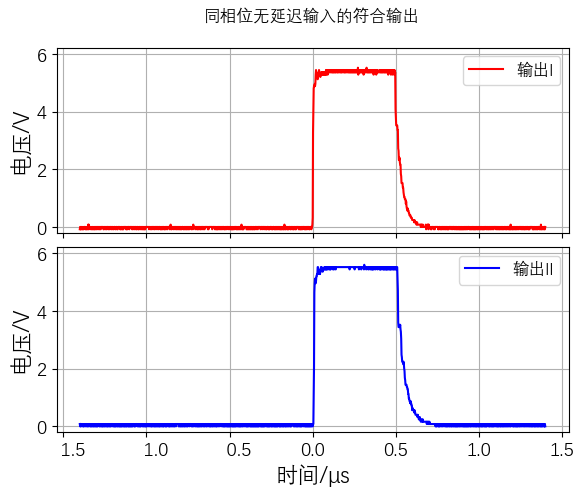

(array([-1.4  , -1.398, -1.396, ...,  1.394,  1.396,  1.398]),
 array([-0.08,  0.  , -0.08, ..., -0.08, -0.08,  0.  ]),
 array([0.08, 0.  , 0.08, ..., 0.  , 0.08, 0.  ]),
 'μs')

In [8]:
#序号1
save='../pic/fh.pdf'
y1range=y2range=(-0.2,6.2)
mydraw2('2_fh.csv',title='同相位无延迟输入的符合输出',label1='输出I',label2='输出II',yrange=(y1range,y2range),time_unit='us',save=save)

d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


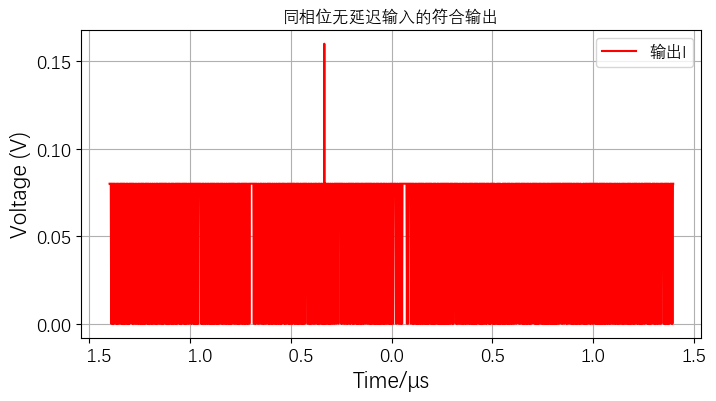

(array([-1.4  , -1.398, -1.396, ...,  1.394,  1.396,  1.398]),
 array([0.08, 0.08, 0.08, ..., 0.  , 0.08, 0.08]),
 'μs')

In [11]:
save='../pic/caogao.pdf'
mydraw('2_ffh.csv',choice=2,title='同相位无延迟输入的符合输出',label='输出I',time_unit='us')#,save=save)

C:\Users\admin\AppData\Local\Temp\ipykernel_19320\3356260390.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(save,bbox_inches='tight')
C:\Users\admin\AppData\Local\Temp\ipykernel_19320\3356260390.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(save,bbox_inches='tight')


<Figure size 800x400 with 0 Axes>

d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


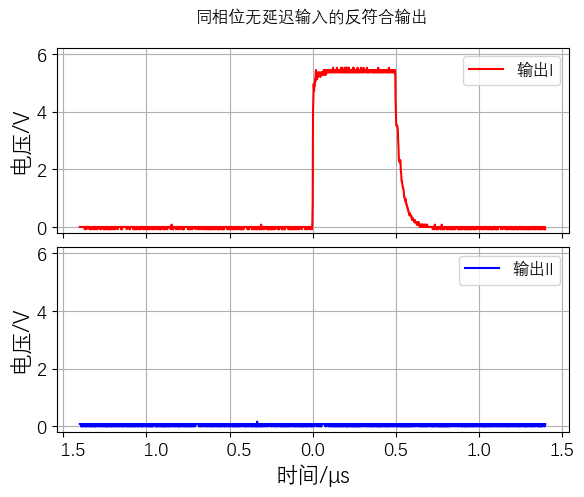

(array([-1.4  , -1.398, -1.396, ...,  1.394,  1.396,  1.398]),
 array([ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  , -0.08]),
 array([0.08, 0.08, 0.08, ..., 0.  , 0.08, 0.08]),
 'μs')

In [10]:
#序号1
save='../pic/ffh.pdf'
y1range=y2range=(-0.2,6.2)
mydraw2('2_ffh.csv',title='同相位无延迟输入的反符合输出',label1='输出I',label2='输出II',yrange=(y1range,y2range),time_unit='us',save=save)